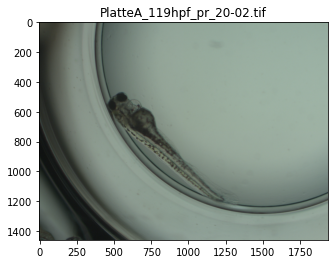

In [1]:
from skimage import io

# Load the image
image_path = 'Zebra_fish_data/TIFF_exp2_181024/PlatteA_119hpf_pr_20-02.tif'
image = io.imread(image_path)

# Display the image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title('PlatteA_119hpf_pr_20-02.tif')
plt.show()

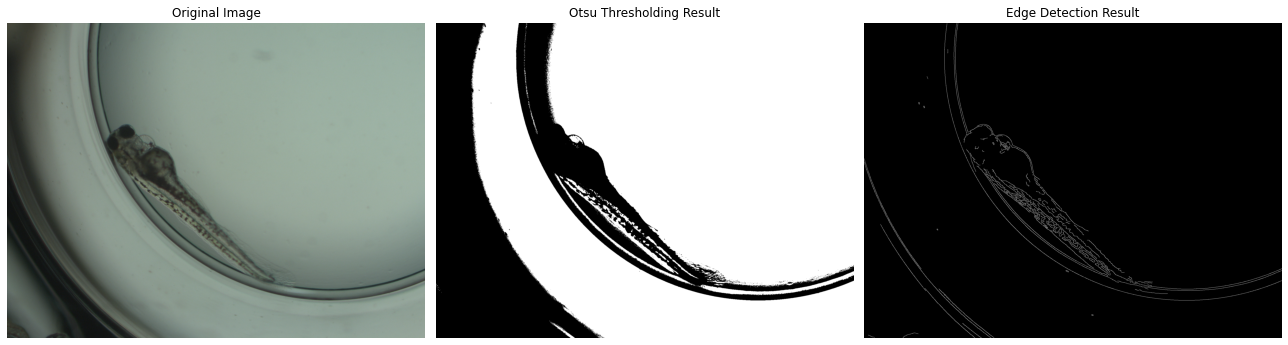

Otsu's threshold value: 0.4360946185661765


In [4]:
import numpy as np
from skimage import filters, color, feature
import matplotlib.pyplot as plt

def apply_otsu_threshold(image):
    """
    Apply Otsu's thresholding method to segment the input image.

    Parameters:
        image (numpy.ndarray): Input grayscale or RGB image.

    Returns:
        binary_image (numpy.ndarray): Binary image after applying Otsu's thresholding.
        threshold_value (float): The calculated threshold value.
    """
    # Convert RGB to grayscale if necessary
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Calculate Otsu's threshold
    threshold_value = filters.threshold_otsu(image)

    # Create a binary image using the threshold
    binary_image = image > threshold_value

    return binary_image, threshold_value

def apply_edge_filter(image):
    """
    Apply an edge filter (Canny) to the input image.

    Parameters:
        image (numpy.ndarray): Input grayscale or RGB image.

    Returns:
        edges (numpy.ndarray): Binary image with edges detected.
    """
    # Convert RGB to grayscale if necessary
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Apply Canny edge detection
    edges = feature.canny(image)

    return edges

# Example usage (replace `image` with your actual image variable):
binary_image, threshold_value = apply_otsu_threshold(image)
edges = apply_edge_filter(image)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original Image
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Binary Image
axes[1].imshow(binary_image, cmap="gray")
axes[1].set_title("Otsu Thresholding Result")
axes[1].axis("off")

# Edge Image
axes[2].imshow(edges, cmap="gray")
axes[2].set_title("Edge Detection Result")
axes[2].axis("off")

plt.tight_layout()
plt.show()

# Print the threshold value
print(f"Otsu's threshold value: {threshold_value}")